**Задание**

**Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания:**

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

**Результат:**
проведена оценка качества модели классификации;
реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

**Форма выполнения:**
ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:
Jupyter Notebook/Google Colab
GitHub
файл athletes.csv

**Рекомендации к выполнению:**

Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально).

Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [ ]:
#1. Загрузка данных, их обработка и подготовка к моделированию
import pandas as pd

athlets_data = pd.read_csv('/content/athletes.csv')
athlets_data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
athlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
#Проверим дубликаты, уберем их, если они есть
athlets_data = athlets_data.drop_duplicates()
athlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


В качестве **целевой переменной** выберем **пол**.

Исходя из этого уберем неинформативные столбцы.

In [ ]:
#Уберем неинформативные столбцы
athlets_data.drop(['id', 'name', 'nationality', 'dob'], axis = 1, inplace=True)
athlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     11538 non-null  object 
 1   height  11208 non-null  float64
 2   weight  10879 non-null  float64
 3   sport   11538 non-null  object 
 4   gold    11538 non-null  int64  
 5   silver  11538 non-null  int64  
 6   bronze  11538 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 631.1+ KB


In [ ]:
#Заполним пропуски в показателях роста и веса спортсменов средним значением в разрезе пола и вида спорта
athlets_data['height'] = athlets_data['height'].fillna(athlets_data.groupby(['sex', 'sport'])['height'].transform('mean'))
athlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     11538 non-null  object 
 1   height  11538 non-null  float64
 2   weight  10879 non-null  float64
 3   sport   11538 non-null  object 
 4   gold    11538 non-null  int64  
 5   silver  11538 non-null  int64  
 6   bronze  11538 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 631.1+ KB


In [ ]:
athlets_data['weight'] = athlets_data['weight'].fillna(athlets_data.groupby(['sex', 'sport'])['weight'].transform('mean'))
athlets_data.info()
#После заполнения все равно остались пустые значения по столбцу weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     11538 non-null  object 
 1   height  11538 non-null  float64
 2   weight  11252 non-null  float64
 3   sport   11538 non-null  object 
 4   gold    11538 non-null  int64  
 5   silver  11538 non-null  int64  
 6   bronze  11538 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 631.1+ KB


In [ ]:
#Посмотрим на строки с пустыми значениями
filtered_df = athlets_data[athlets_data.isna().any(axis=1)]
filtered_df

,sex,height,weight,sport,gold,silver,bronze
28,male,1.860000,NaN,boxing,0,0,0
30,male,1.780000,NaN,boxing,0,0,0
37,male,1.850000,NaN,boxing,0,0,0
50,male,1.757615,NaN,boxing,0,0,0
53,male,1.880000,NaN,boxing,0,0,0
...,...,...,...,...,...,...,...
11465,female,1.540000,NaN,boxing,0,0,0
11468,male,1.820000,NaN,boxing,0,0,0
11513,male,1.780000,NaN,boxing,0,0,0
11514,female,1.650000,NaN,boxing,0,0,0


In [ ]:
print(athlets_data['sport'].value_counts())
print(filtered_df['sport'].value_counts())

#По боксу значения веса спортсмена не фиксировалось совсем

sport
athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               380
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: count, dtype: int64
sport
boxing    286
Name: count, dtype: int64


In [ ]:
#Заполним оставшиеся пропуски по weight средним значением в разрезе пола
athlets_data['weight'] = athlets_data['weight'].fillna(athlets_data.groupby('sex')['weight'].transform('mean'))
athlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     11538 non-null  object 
 1   height  11538 non-null  float64
 2   weight  11538 non-null  float64
 3   sport   11538 non-null  object 
 4   gold    11538 non-null  int64  
 5   silver  11538 non-null  int64  
 6   bronze  11538 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 631.1+ KB


In [ ]:
athlets_data.describe()
#Аномальных значений нет

,height,weight,gold,silver,bronze
count,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000
mean,1.766206,72.164770,0.057722,0.056769,0.061016
std,0.111611,15.839912,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.152542,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,80.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


Закодируем категориальные переменные

In [ ]:
#Посмотрим на количество групп внутри категориальных переменных, чтобы выбрать подхоящий метод кодировки
print(athlets_data['sex'].value_counts())
print(athlets_data['sport'].value_counts())

sex
male      6333
female    5205
Name: count, dtype: int64
sport
athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               380
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: count, dtype: int64


In [ ]:
# целевая переменная (столбец sex) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
athlets_data.loc[:, 'gender_category'] = le.fit_transform(athlets_data.loc[:, 'sex'])
athlets_data.head()

,sex,height,weight,sport,gold,silver,bronze,gender_category
0,male,1.72,64.0,athletics,0,0,0,1
1,female,1.68,56.0,fencing,0,0,0,0
2,male,1.98,79.0,athletics,0,0,1,1
3,male,1.83,80.0,taekwondo,0,0,0,1
4,male,1.81,71.0,cycling,0,0,0,1


In [ ]:
athlets_data.drop('sex', axis = 1, inplace = True)

In [ ]:
athlets_data.head()

,height,weight,sport,gold,silver,bronze,gender_category
0,1.72,64.0,athletics,0,0,0,1
1,1.68,56.0,fencing,0,0,0,0
2,1.98,79.0,athletics,0,0,1,1
3,1.83,80.0,taekwondo,0,0,0,1
4,1.81,71.0,cycling,0,0,0,1


In [ ]:
#закодируем категориальную переменную (sport)
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder_athlet_sport = pd.DataFrame(encoder.fit_transform(athlets_data[['sport']]).toarray())
encoder_athlet_sport

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Выведем новые признаки с помощью метода .get_feature_names_out().
encoder.get_feature_names_out()

array(['sport_aquatics', 'sport_archery', 'sport_athletics',
       'sport_badminton', 'sport_basketball', 'sport_boxing',
       'sport_canoe', 'sport_cycling', 'sport_equestrian',
       'sport_fencing', 'sport_football', 'sport_golf',
       'sport_gymnastics', 'sport_handball', 'sport_hockey', 'sport_judo',
       'sport_modern pentathlon', 'sport_rowing', 'sport_rugby sevens',
       'sport_sailing', 'sport_shooting', 'sport_table tennis',
       'sport_taekwondo', 'sport_tennis', 'sport_triathlon',
       'sport_volleyball', 'sport_weightlifting', 'sport_wrestling'],
      dtype=object)

In [ ]:
#Используем вывод этого метода, чтобы добавить названия столбцов.
encoder_athlet_sport.columns = encoder.get_feature_names_out()
encoder_athlet_sport

,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Присоединим новые признаки к исходному датафрейму,удалив признак workclass.

athlets_data = athlets_data.join(encoder_athlet_sport)
athlets_data.drop('sport', axis = 1, inplace = True)

In [ ]:
athlets_data

,height,weight,gold,silver,bronze,gender_category,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.68,56.0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.98,79.0,0,0,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.83,80.0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.81,71.0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11534,1.73,63.0,0,0,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,1.85,100.0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11536,1.60,56.0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#2. Разделим выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
from sklearn.model_selection import train_test_split

In [ ]:
X = athlets_data.loc[:, athlets_data.columns != 'gender_category'] #признаки
y = athlets_data['gender_category'] #Целевая переменная

In [ ]:
print(X.shape)
print(y.shape)

(11538, 33)
(11538,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9230, 33)
(9230,)
(2308, 33)
(2308,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
                      StandardScaler(),
                      LogisticRegression(max_iter=1000)
                      )

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
#Для тестового множества предскажем уровень дохода и сравним с истинным значением
predictions = model.predict_proba(X_test)
print(predictions)

[[0.94575814 0.05424186]
 [0.71260652 0.28739348]
 [0.96865976 0.03134024]
 ...
 [0.64376461 0.35623539]
 [0.91741283 0.08258717]
 [0.94176938 0.05823062]]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(f'Точность модели (обучающая выборка): {model.score(X_train, y_train)}')
print(f'Точность модели (тестовая выборка): {model.score(X_test, y_test)}')

Точность модели (обучающая выборка): 0.8223185265438786
Точность модели (тестовая выборка): 0.8305892547660312


In [ ]:
#3. Построим ROC-кривую с помощью функции sklearn.metrics.roc_curve.
from sklearn.metrics import roc_curve

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
print(fpr[:5])
print(tpr[:5])
print(thres[:5])

[0. 0. 0. 0. 0.]
[0.         0.00078927 0.01420679 0.01578532 0.02052092]
[1.99997328 0.99997328 0.9996426  0.99956446 0.99933146]


In [ ]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9999732792588778)
(0.0, 0.0007892659826361484, 0.9999732792588778)
(0.0, 0.014206787687450671, 0.9996425977495319)
(0.0, 0.01578531965272297, 0.9995644580648158)
(0.0, 0.020520915548539857, 0.9993314608644231)
(0.0, 0.022099447513812154, 0.9991944642772811)
(0.0, 0.030781373322809787, 0.9984804165398741)
(0.0009606147934678194, 0.030781373322809787, 0.9984045331312535)
(0.0009606147934678194, 0.03393843725335438, 0.9981959203760415)
(0.0019212295869356388, 0.03393843725335438, 0.9981840938428699)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

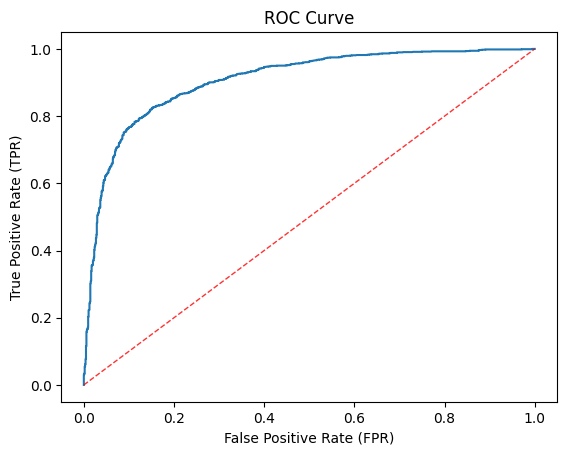

In [ ]:
l=np.linspace(0,1)
plt.plot(fpr, tpr)
plt.plot(l, l, color = 'red', lw=1, linestyle='--', alpha=.8)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('ROC Curve')
plt.show()

#Чем больше кривая охватывает верхний левый угол графика,
#тем лучше модель классифицирует данные по категориям.

#Как видно из графика, наша модель логистической регрессии
#доcтаточно хорошо справляется с классификацией данных по категориям.

In [ ]:
#4. Вычислим значения ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
from sklearn import metrics

auc = metrics.roc_auc_score(y_test.values, predictions[::,1])
auc

0.9063988166317525

AUC — площадь под кривой, которая говорит нам, какая часть графика расположена под кривой.

Чем ближе AUC к 1, тем лучше модель. Модель со значением AUC, равным 0,5, ничем не лучше модели со случайными классификациями.

В нашем случае auc равен 0.9, что говорит о хорошем качестве модели

In [ ]:
#5. Реализуйте подсчет метрик TPR, FPR «вручную»,

#Создадим функцию для расчета матрицы ошибок
def error_matrix(thresh, predictions, y_test):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip(predictions[:, 1], y_test):
        if predicted_prob >= thresh:
           predicted = 1
        else:
           predicted = 0
        if predicted == 1:
           if actual == 1:
             tp += 1
           else:
             fp += 1
        else:
           if actual == 1:
              fn += 1
           else:
              tn += 1
    return(tp, fp, fn, tn)

In [ ]:
thresholds = np.linspace(0,1,50)

fpr_own_all = []
tpr_own_all = []

for thresh in thresholds:
    tp, fp, fn, tn = error_matrix(thresh, predictions, y_test)


    if fp == 0 and tn == 0:
        fpr_own_all.append(0)
    else:
        fpr_own = fp/(fp+tn)
        fpr_own_all.append(fpr_own)
    if tp == 0 and fn == 0:
        tpr_own_all.append(0)
    else:
        tpr_own = tp/(tp+fn)
        tpr_own_all.append(tpr_own)

In [ ]:
fpr_own_all[:5], tpr_own_all[:5]

([1.0,
  0.9414024975984631,
  0.878001921229587,
  0.8126801152737753,
  0.7492795389048992],
 [1.0,
  0.9984214680347278,
  0.9968429360694554,
  0.9928966061562746,
  0.9913180741910024])

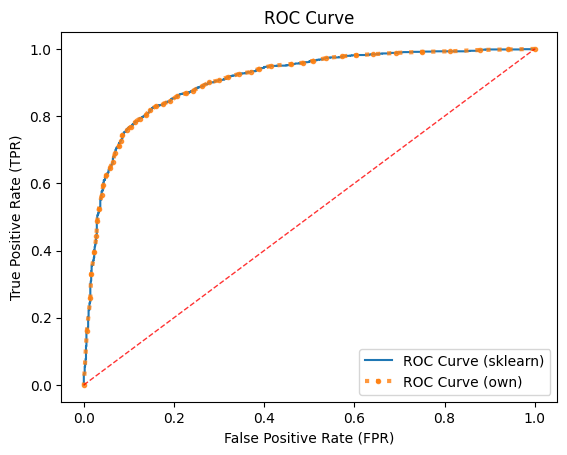

In [ ]:
#6. Построим ROC-кривую с помощью вычисленных в п. 5 метрик: объединим графики из п. 3 и п. 6 в один.

l=np.linspace(0,1)
plt.plot(fpr, tpr, label = 'ROC Curve (sklearn)')
plt.plot(fpr_own_all, tpr_own_all,label = 'ROC Curve (own)', linestyle=':', lw=3, alpha=.8, marker='.')
plt.plot(l, l, color = 'red', lw=1, linestyle='--', alpha=.8)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Самостоятельный расчет fpr и tpr совпадает с расчетами встроенных методов sklearn.

In [ ]:
#7. Построим график Precision-Recall, используя метрики, посчитанные в п. 5.
thresholds = np.linspace(0,1,300)

precision_ = []
recall_ = []

for thresh in thresholds:
    tp, fp, fn, tn = error_matrix(thresh, predictions, y_test)

    if tp == 0 and fp == 0:
        precision_.append(0)
    else:
        precision_own = tp/(tp+fp)
        precision_.append(precision_own)
    if tp == 0 and fn == 0:
        recall_.append(0)
    else:
        recall_own = tp/(tp+fn)
        recall_.append(recall_own)

In [ ]:
precision_[:5], recall_[:5]

([0.5489601386481803,
  0.5501519756838906,
  0.5516339869281046,
  0.5550197281893906,
  0.5575143234905244],
 [1.0, 1.0, 0.9992107340173638, 0.9992107340173638, 0.9984214680347278])

In [ ]:
#проверим полученные метрики с метриками, рассчитанными с помощью библиотеки sklearn
from sklearn.metrics import precision_recall_curve

In [ ]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [ ]:
# посмотрим что получилось
for line in zip(pr[:10], re[:10], thres[:10]):
    print(line)

(0.5489601386481803, 1.0, 0.0016821651923755547)
(0.5491980927611617, 1.0, 0.0018854417425257129)
(0.5494362532523851, 1.0, 0.001960600870711831)
(0.5496746203904556, 1.0, 0.002740358378953387)
(0.5499131944444444, 1.0, 0.002902275832960533)
(0.5501519756838906, 1.0, 0.0033469487731722027)
(0.5503909643788011, 1.0, 0.0033704087633415645)
(0.5501955671447197, 0.9992107340173638, 0.0037653564969746633)
(0.5504347826086956, 0.9992107340173638, 0.00530915389866323)
(0.5506742061765986, 0.9992107340173638, 0.00559148980902596)


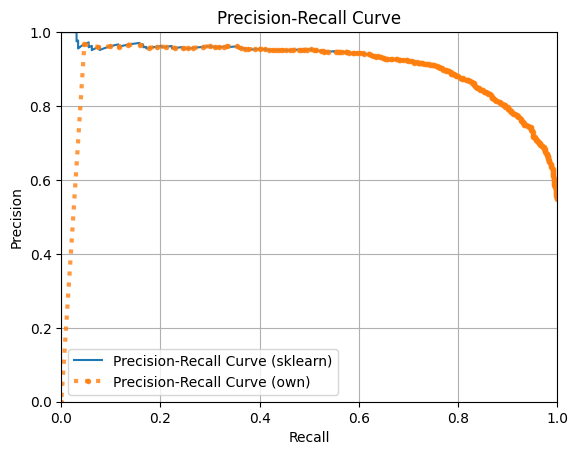

In [ ]:
plt.plot(re, pr, label = 'Precision-Recall Curve (sklearn)')
plt.plot(recall_, precision_,label = 'Precision-Recall Curve (own)', linestyle=':', lw=3, alpha=.8, marker='.')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='best')
plt.show()

#Метрики совпали

In [ ]:
#8. Вычислим значение ROC-AUC метрики
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.9063988166317525

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

0.9063988166317525

Для подсчета ROC-AUC можно воспользоваться функцией numpy.trapz для подсчета площади под кривой, как здесь:

https://github.com/akshaykapoor347/Compute-AUC-ROC-from-scratch-python/blob/master/AUCROCPython.ipynb

**Выводы:**

**a. Как по полученным графикам сделать вывод о качестве модели?**

1) Чем больше ROC кривая охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям.

2) Precision показывает долю объектов, названных нашей моделью положительными и при этом действительно являющимися положительными.

Recall показывает нам какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Кривая Precision-Recall показывает соотношение между Precision и Recall в зависимости от пороговых значений.

Каждое значение оценки классификатора для каждого тестового примера показывает, насколько уверенно классификатор предсказывает положительный класс или отрицательный класс.

Выбор фиксированного порога принятия решения (treshold) определяет правило классификации.

Изменяя порог принятия решения по всему диапазону возможных оценок классификатора, мы получаем серию результатов классификации, которые образуют кривую.

Если порог высокий, например ≥ 0.7, мы получаем «консервативный» классификатор с высоким уровнем precision, но низким recall (то есть модель с меньшей вероятностью даст положительный результат, но если такой положительный результат модель все-таки даст, то она в нем достаточно хорошо уверена).

Уменьшая порог, получаем более «либеральный» классификатор с большим значением recall, зато низким precision.

Таким образом, чтобы увеличить recall (полноту) нашей модели, precision (точность) должен уменьшиться, и наоборот.


**Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

Наша модель достаточно хорошо справляется с задачей классификации спортстменов по их принадлежности к тому или иному полу.

**b. может ли ROC-кривая проходить ниже диагонали?**

Может, но тогда это означает, что наша модель предсказывает все в точности да наоборот. Если мы просто поменяем её ответы на противоположные, то получим лучшее качество модели.